## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [13]:
# Load packages and libraries
! git clone https://www.github.com/DS3001/kmc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fatal: destination path 'kmc' already exists and is not an empty directory.


In [14]:
# Load dataset
airbnb_df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [15]:
# Isolate the variables and look at them for cleaning
X = airbnb_df.loc[:, ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]
print(X.shape)
X.describe()

# The dimensions show 30478 rows in the dataset, but 'Beds' and 'Review Scores Rating' have less observations
# Price is not showing up....needs cleaning

(30478, 4)


,Beds,Number Of Reviews,Review Scores Rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [16]:
# Clean Price
print(X['Price'].value_counts()) # Issue is there are commas, so we need to remove them
X['Price'] = X['Price'].str.replace(',', '') # Now change to numeric
X['Price'] = pd.to_numeric(X['Price'], errors = 'coerce')
X.describe() # Success!

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: Price, Length: 511, dtype: int64


,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [17]:
# Clean Beds
print(X['Beds'].value_counts()) # Seems like there are some missing values
X['Beds'] = X['Beds'].fillna(1) # 1 is the most common, could be safe to replace missings with that
X.describe() # Success!

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64


,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [18]:
# Clean Review Scores Rating
pd.crosstab(airbnb_df['Review Scores Rating'].isnull(), airbnb_df['Number Of Reviews'] > 0) # Check how many missings there are when there are reviews
# 509 actual missing values, but 7814 just do not have reviews at all which is why the rating is missing

Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


In [19]:
# Let's remove all of the missing values, they will mess with our data
X = X.dropna()
print(X.shape)
X.describe() # Success!

(22155, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [20]:
# Maxmin normalize
def maxmin(x):
  z = (x - min(x)) / (max(x) - min(x))
  return z
Z = X.drop('Price', axis = 1) # Not looking at this variable anymore
Z = Z.apply(maxmin)

In [21]:
# Cluster data
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(Z)
Z['Cluster'] = model.labels_
Z.describe()

,Beds,Number Of Reviews,Review Scores Rating,Cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


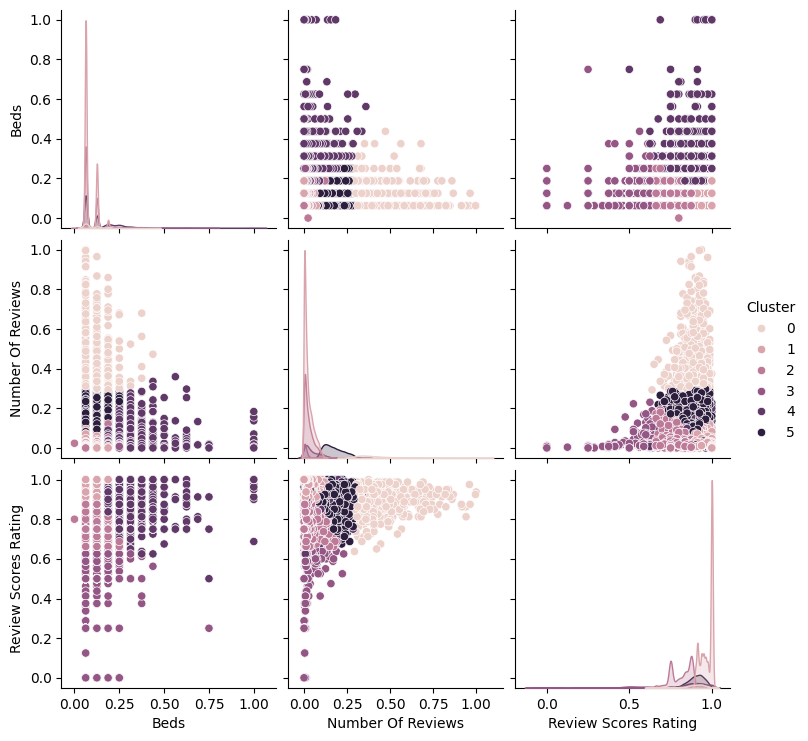

In [22]:
# Make a grid of scatterplots
sns.pairplot(data = Z, hue = 'Cluster')

In [23]:
# Compute average price for each cluster
X['Cluster'] = model.labels_
X.loc[:, ['Price', 'Cluster']].groupby('Cluster').describe()

# Cluster 4 seems to have the highest rental prices, in terms of min and all of the percentiles.
# Cluster 1 has the highest range and a pretty high price as well, but cluster 3 has a higher price than 1

Price                                                              
           count        mean         std   min     25%    50%     75%      max
Cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Text(0.5, 1.0, 'Scree Plot')

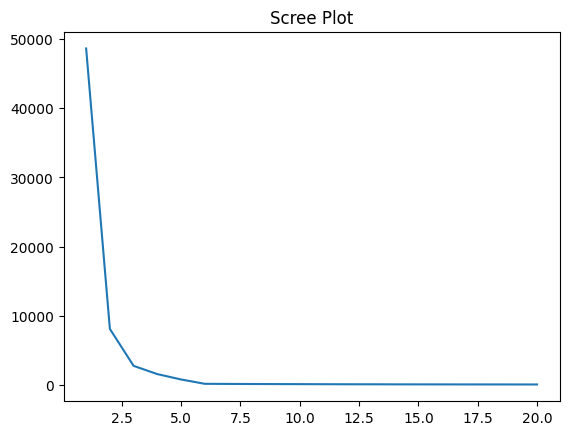

In [24]:
k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(Z)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot')
# Anywhere between 1-3 looks good --> let's try 3

In [25]:
# Create model again
model = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(Z)
Z['Cluster'] = model.labels_

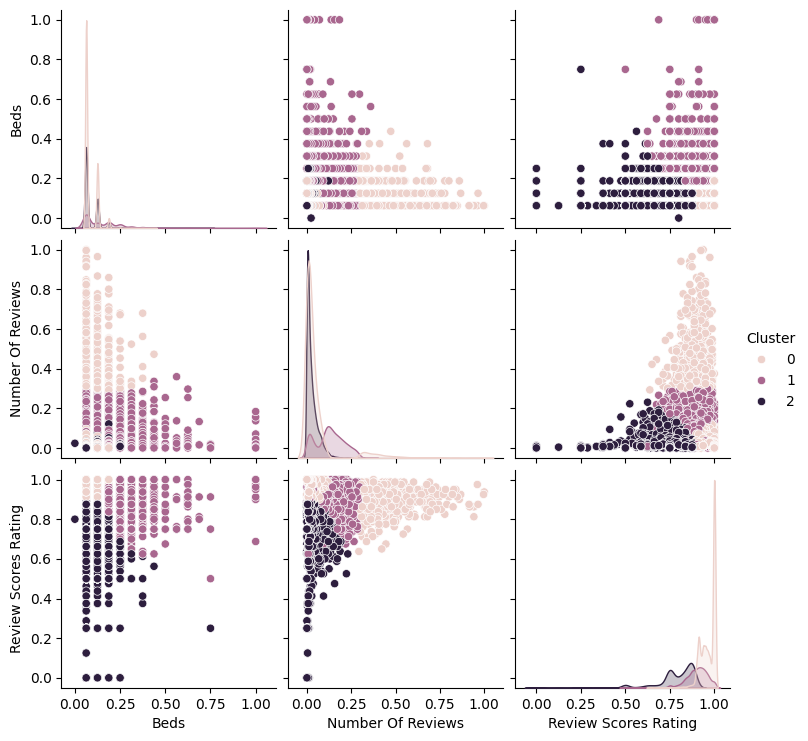

In [26]:
# Make grid of scatterplots again
sns.pairplot(data = Z, hue = 'Cluster')

In [27]:
# Compute average price again
X['Cluster'] = model.labels_
X.loc[:, ['Price', 'Cluster']].groupby('Cluster').describe()

# Cluster 1 has the highest price, across all quartiles and by looking at the mean
# Cluster 0 has the largest range

Price                                                            
           count        mean         std   min   25%    50%     75%      max
Cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [28]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

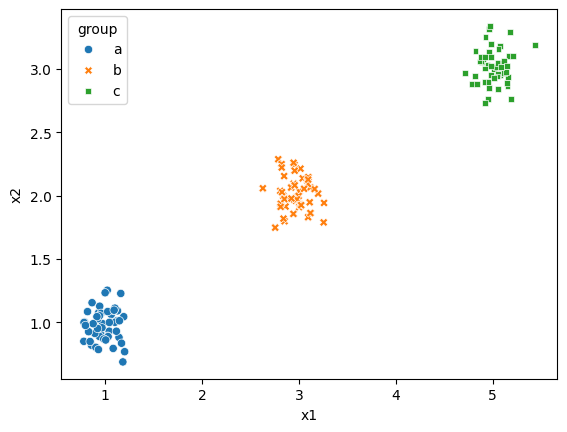

In [30]:
# Scatterplot for df0_125
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

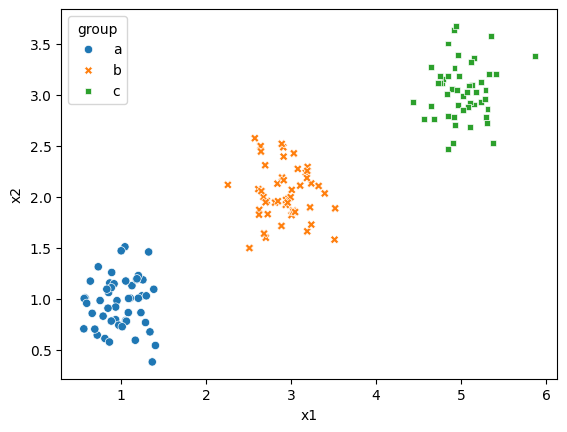

In [31]:
# Scatterplot for df0_25
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

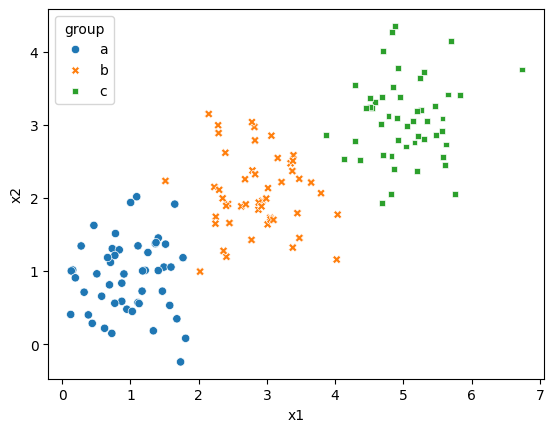

In [32]:
# Scatterplot for df0_5
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

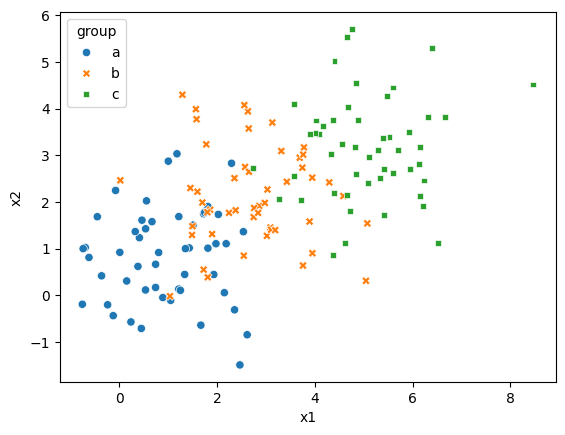

In [34]:
# Scatterplot for df1_0
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

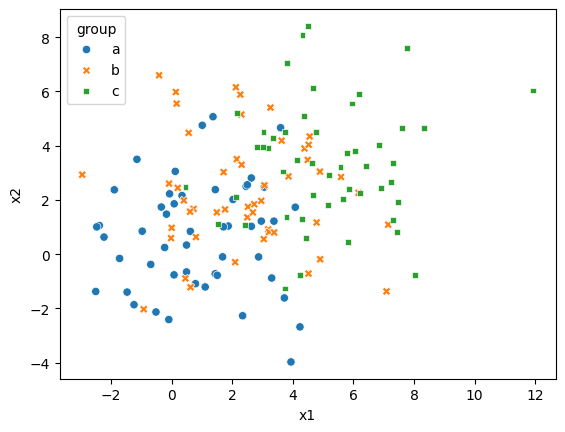

In [35]:
# Scatterplot for df2_0
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

As the noise goes up, the visual distinctness decreases. When the noise was low, the clusters were distinct and clear grouping could be seen. However, as the noise increased, the clusters became less organized and the groups eventually started mixing.

In [ ]:
# Maxmin normalize
def maxmin(x):
  z = (x - min(x)) / (max(x) - min(x))
  return z

Text(0.5, 1.0, 'Scree Plot - df0_125')

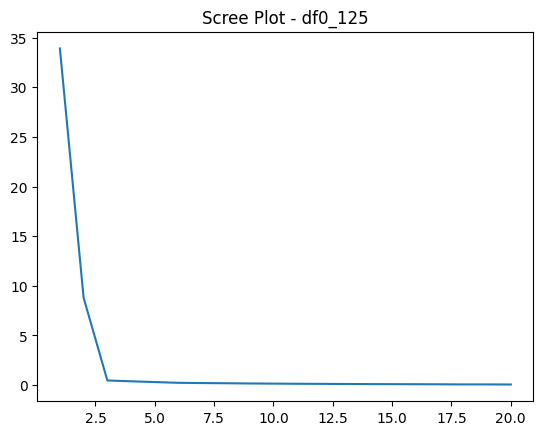

In [36]:
# Scree plot for df0_125
X = df0_125.loc[:, ['x1', 'x2']]
X = X.apply(maxmin)

k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot - df0_125')

Text(0.5, 1.0, 'Scree Plot - df0_25')

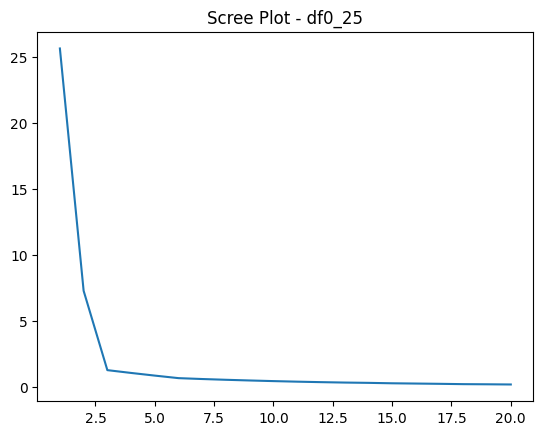

In [37]:
# Scree plot for df0_25
X = df0_25.loc[:, ['x1', 'x2']]
X = X.apply(maxmin)

k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot - df0_25')

Text(0.5, 1.0, 'Scree Plot - df0_5')

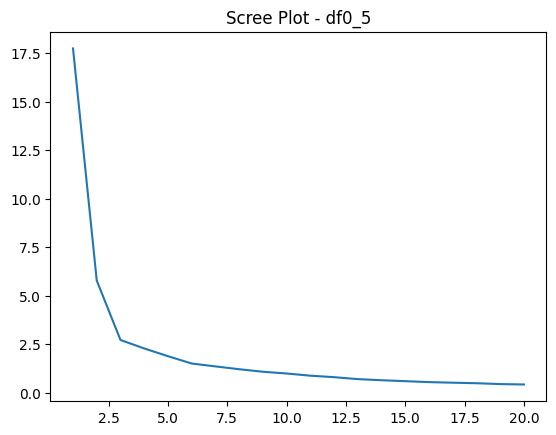

In [38]:
# Scree plot for df0_5
X = df0_5.loc[:, ['x1', 'x2']]
X = X.apply(maxmin)

k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot - df0_5')

Text(0.5, 1.0, 'Scree Plot - df1_0')

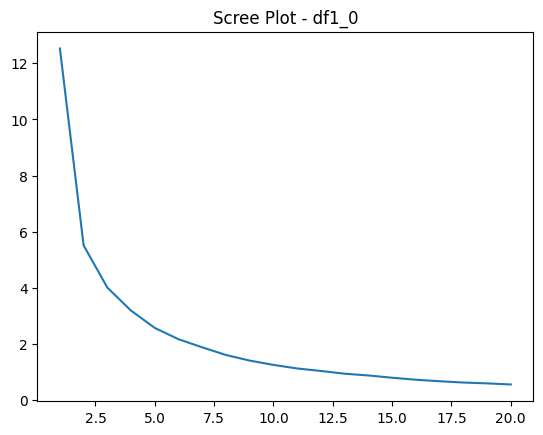

In [39]:
# Scree plot for df1_0
X = df1_0.loc[:, ['x1', 'x2']]
X = X.apply(maxmin)

k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot - df1_0')

Text(0.5, 1.0, 'Scree Plot - df2_0')

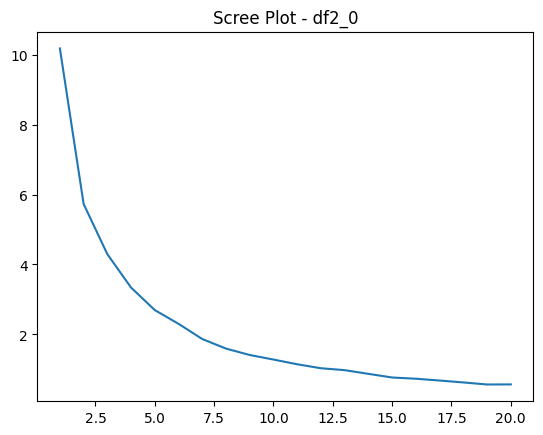

In [40]:
# Scree plot for df2_0
X = df2_0.loc[:, ['x1', 'x2']]
X = X.apply(maxmin)

k_bar = 20
k_nums = np.arange(1, (k_bar + 1))
SSE = np.zeros(k_bar)
for k in range (k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE[k] = model.inertia_

sns.lineplot(x = k_nums, y = SSE).set_title('Scree Plot - df2_0')

As the level of noise increased, the presence of a clear "elbow" decreased. The graph got rounder and rounder instead of sharp, which makes it harder to find a definitive elbow point. Thus, it is harder to select a k, which ultimately impacts further analyses.

The lower the noise, the more separated and distinct the groups are. Since they form nicely established clusters, it is easier to see the differences in the data. Additonally, when we make a scree plot with the data, we are able to clearly see an elbow and find a good k value to use. This allows us to perform further analyses that are accurate. If the noise is high, however, the groups start mixing and the scree plot becomes rounder, making it harder for us to determine a good k value. Therefore, the scree plot is useful when the noise is low and clusters are distinct, as there is a clear elbow. It is not as useful when the noise is high and clusters are not defined, as the graph is more smooth.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?